# Import Library

In [ ]:
# Import library
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Mount google drive

In [ ]:
# Mounting Google Drive to Google Colab to access files and datasets directly from the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing the current working directory to a specific folder in Google Drive
import os
os.chdir("/content/drive/MyDrive/Audio 1")

# Data loading

In [ ]:
import os
import librosa
import numpy as np

# Define the path to your dataset
dataset_path = "/content/drive/MyDrive/Audio 1"

# Define paths and labels lists
paths = []
labels = []

# Loop through files in the dataset directory
for filename in os.listdir(dataset_path):
    if filename.endswith(".wav"):  # Assuming your files are in .wav format
        file_path = os.path.join(dataset_path, filename)
        paths.append(file_path)
        label = filename.split('_')[-1].split('.')[0].lower()
        labels.append(label)

# Print confirmation that dataset is loaded
print("Dataset is loaded")


Dataset is loaded


In [ ]:
# Print the number of audio files loaded in dataset
len(paths)

1200

In [ ]:
# Display the paths of the first 5 audio files in the dataset
paths[:5]

['/content/drive/MyDrive/Audio 1/OAF_ditch_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_five_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_cause_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_check_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_bath_sad.wav']

# Get the labels

In [ ]:
# Display the labels of the first 10 audio files in the dataset
labels[:10]

['sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
labels[10:]

['sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',


In [ ]:
paths[5:]

['/content/drive/MyDrive/Audio 1/OAF_dog_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_base_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_cheek_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_door_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_cab_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_came_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_chalk_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_chat_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_chain_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_dodge_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_bone_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_dip_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_bean_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_fail_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_date_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_dime_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_cool_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_far_sad.wav',
 '/content/drive/MyDrive/Audio 1/OAF_fit_sad.wav',
 '/content/dr

# create the data frame

In [ ]:
# crate a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

# Display the first few rows of the DataFrame
df.head()

,speech,label
0,/content/drive/MyDrive/Audio 1/OAF_ditch_sad.wav,sad
1,/content/drive/MyDrive/Audio 1/OAF_five_sad.wav,sad
2,/content/drive/MyDrive/Audio 1/OAF_cause_sad.wav,sad
3,/content/drive/MyDrive/Audio 1/OAF_check_sad.wav,sad
4,/content/drive/MyDrive/Audio 1/OAF_bath_sad.wav,sad


In [ ]:
# Count the values
df['label'].value_counts()

,count
label,
sad,200
angry,200
disgust,200
happy,200
neutral,200
fear,200


## Exploratory Data Analysis (EDA)

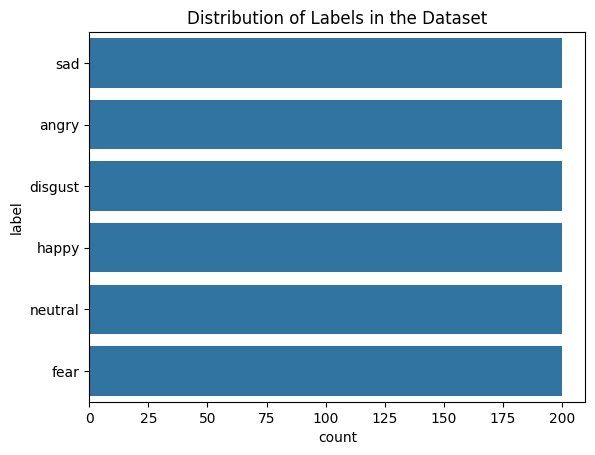

In [ ]:
# Create the count plot
sns.countplot(df['label'])

# Add the caption
plt.title('Distribution of Labels in the Dataset')

# Show the plot
plt.show()

# Speech Recognition

In [ ]:
# Install the SpeechRecognition library for converting speech into text
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 33.2 MB/s eta 0:00:00


# Plot the Waveplot and Spectrogram

In [ ]:

# Waveplot
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Spectrogram
def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# For fear audio

In [ ]:
# Load the first audio file labeled as 'fear' and play the audio
emotion = 'fear'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]
data, sampling_rate = librosa.load(path)
Audio(path)

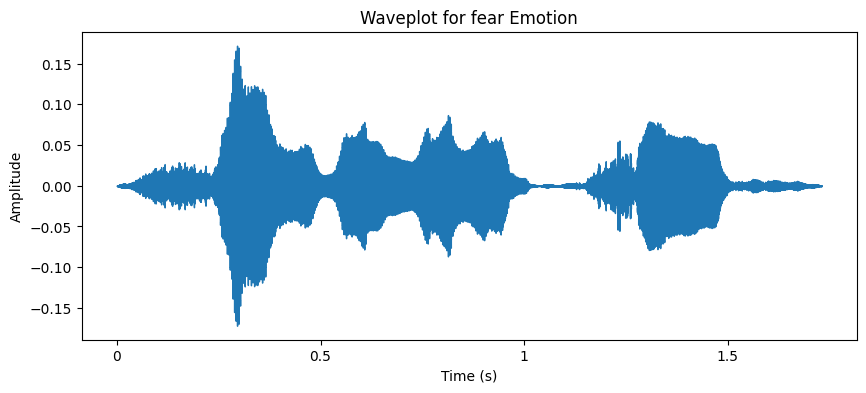

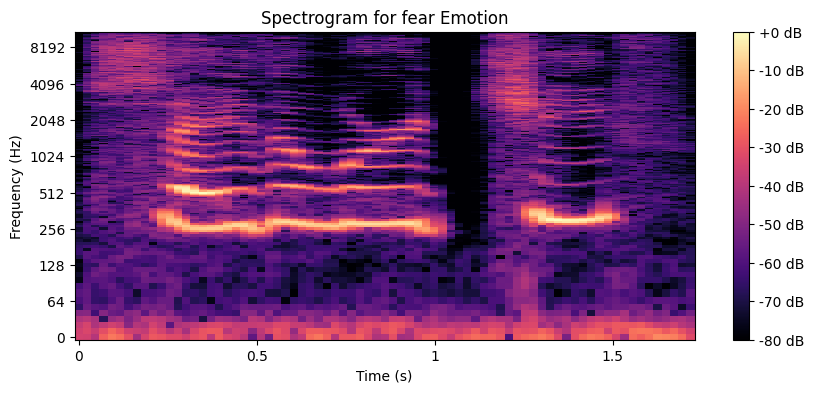

<Figure size 640x480 with 0 Axes>

In [ ]:
# Load the first audio file labeled as 'fear'
emotion = 'fear'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]
data, sampling_rate = librosa.load(path)

# Plot the waveform and spectrogram for the 'fear' audio sample
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

# Play the audio with the given sampling rate
Audio(data, rate=sampling_rate)

# Display the plot with a title indicating the emotion
plt.suptitle("Fear Audio")
plt.show()

In [ ]:

import speech_recognition as sr

# Convert audio to text
def audio_to_text(path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data)
    return text

# Call the function to convert audio to text and print the result
text = audio_to_text(path)
print("Converted Text:", text)


Converted Text: say the word


# For Angry Audio

In [ ]:
# Load the first audio file labeled as 'angry' and play the audio
emotion = 'angry'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]
data, sampling_rate = librosa.load(path)
Audio(path)

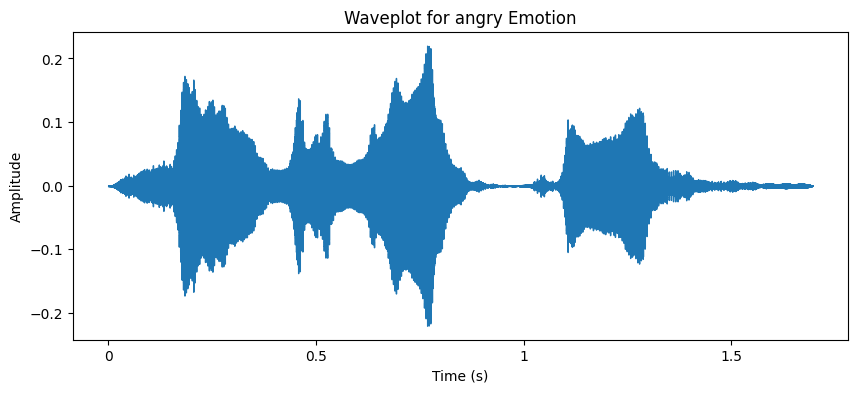

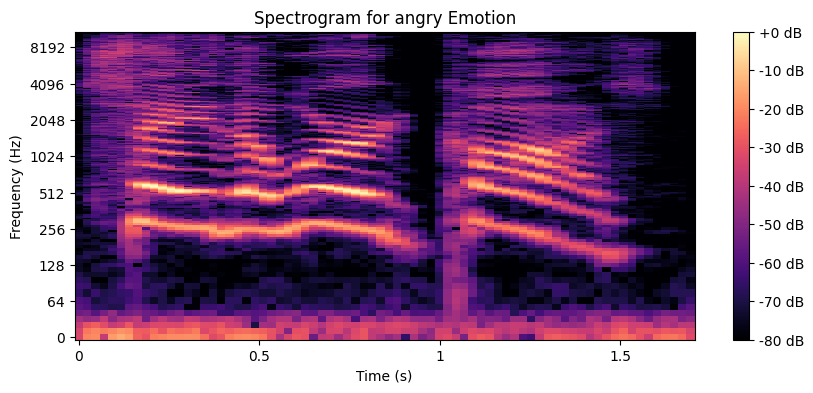

<Figure size 640x480 with 0 Axes>

In [ ]:
# Load the first audio file labeled as 'angry'
emotion = 'angry'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]
data, sampling_rate = librosa.load(path)

# Plot the waveform and spectrogram for the 'angry' audio sample
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

# Play the audio with the given sampling rate
Audio(data, rate=sampling_rate)

# Display the plot with a title indicating the emotion
plt.suptitle("Angry Audio")
plt.show()

# For Happy Audio

In [ ]:
# Load the first audio file labeled as 'happy' and play the audio
emotion = 'happy'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]
data, sampling_rate = librosa.load(path)
Audio(path)

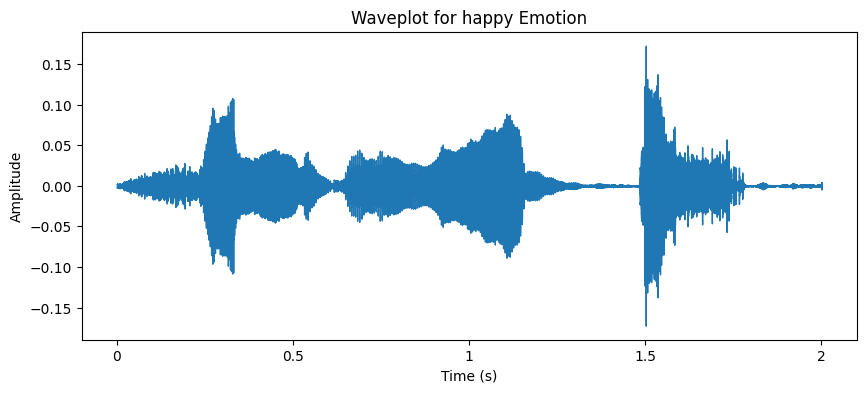

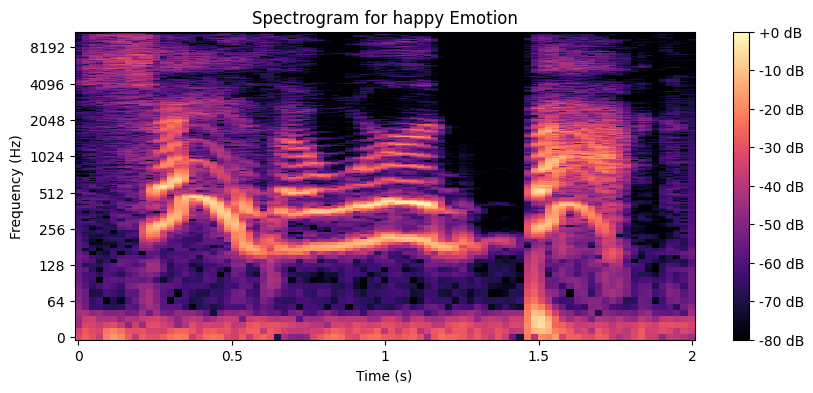

<Figure size 640x480 with 0 Axes>

In [ ]:
# Extract the path of the first audio file with the specified emotion
emotion = 'happy'
path = df.loc[df['label'] == emotion, 'speech'].iloc[0]

# Load the audio file using librosa
data, sampling_rate = librosa.load(path)

# Plot the waveform of the audio data
waveplot(data, sampling_rate, emotion)

# Generate and display the spectrogram of the audio data
spectrogram(data, sampling_rate, emotion)

# Play the loaded audio
Audio(data, rate=sampling_rate)

# Set a title for the plot and display it
plt.suptitle("happy Audio")
plt.show()


# For Sad Audio

In [ ]:
# Load the first audio file labeled as 'sad' and play the audio
emotion = 'sad'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]
data, sampling_rate = librosa.load(path)
Audio(path)

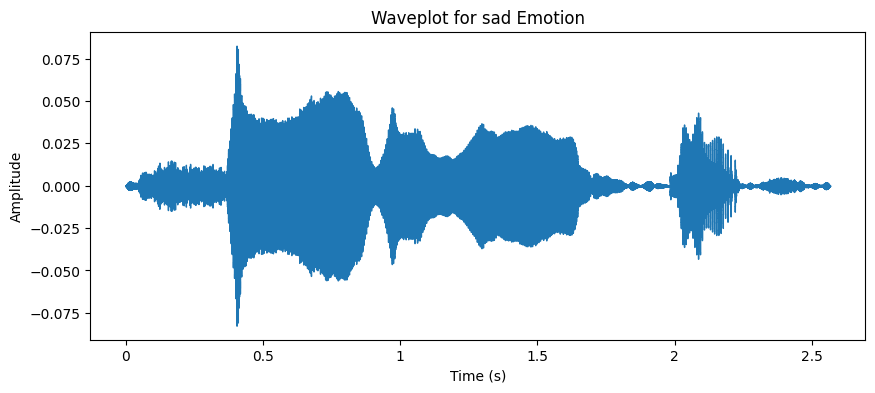

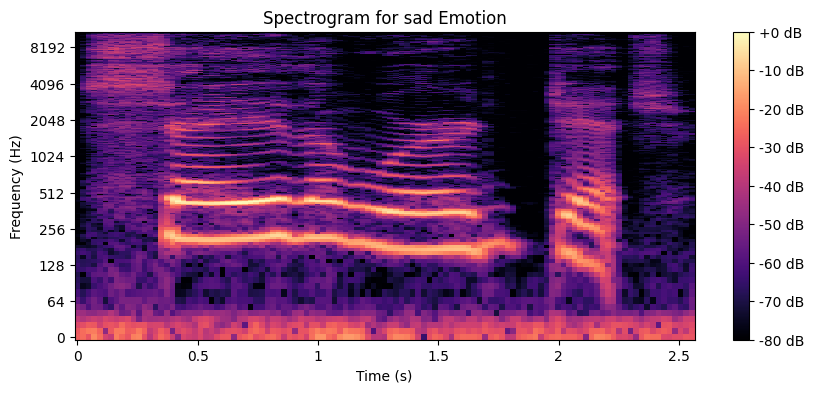

<Figure size 640x480 with 0 Axes>

In [ ]:
# Extract the path of the first audio file with the specified emotion
emotion = 'sad'
path = df.loc[df['label'] == emotion, 'speech'].iloc[0]

# Load the audio file using librosa
data, sampling_rate = librosa.load(path)

# Plot the waveform of the audio data
waveplot(data, sampling_rate, emotion)

# Generate and display the spectrogram of the audio data
spectrogram(data, sampling_rate, emotion)

# Play the loaded audio
Audio(data, rate=sampling_rate)

# Set a title for the plot and display it
plt.suptitle("Sad Audio")
plt.show()


# For Neutral Audio

In [ ]:
# Load the first audio file labeled as 'neutral' and play the audio
emotion = 'neutral'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]
data, sampling_rate = librosa.load(path)
Audio(path)

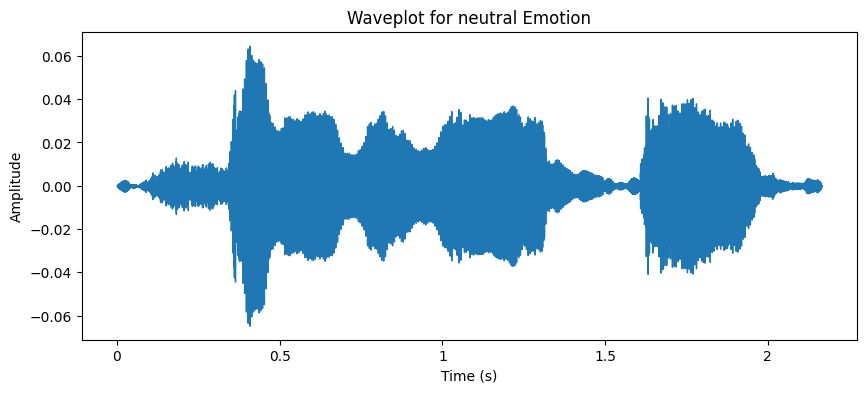

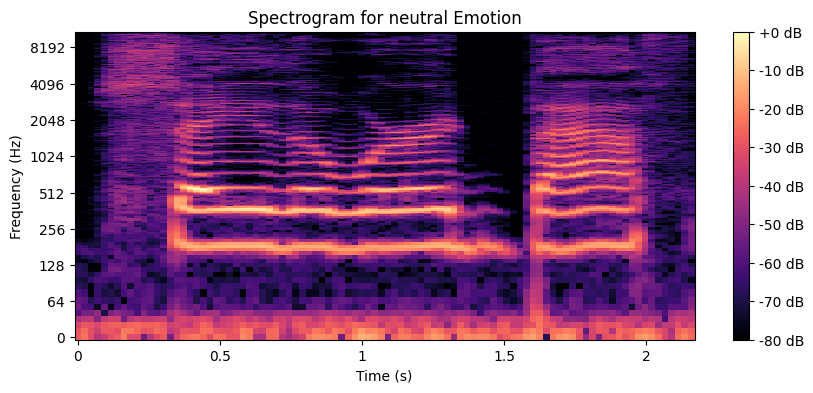

<Figure size 640x480 with 0 Axes>

In [ ]:
# Extract the path of the first audio file with the specified emotion
emotion = 'neutral'
path = df.loc[df['label'] == emotion, 'speech'].iloc[0]

# Load the audio file using librosa
data, sampling_rate = librosa.load(path)

# Plot the waveform of the audio data
waveplot(data, sampling_rate, emotion)

# Generate and display the spectrogram of the audio data
spectrogram(data, sampling_rate, emotion)

# Play the loaded audio
Audio(data, rate=sampling_rate)

# Set a title for the plot and display it
plt.suptitle("Neutral Audio")
plt.show()


# For Disgust Audio

In [ ]:
# Load the first audio file labeled as 'disgust' and play the audio
emotion = 'disgust'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]
data, sampling_rate = librosa.load(path)
Audio(path)

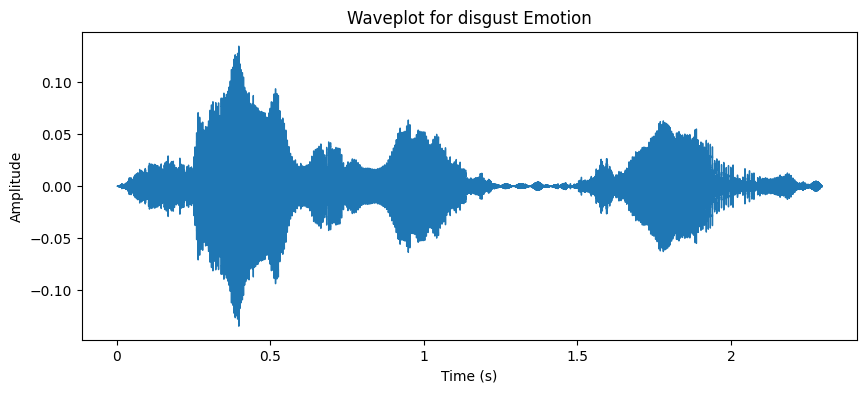

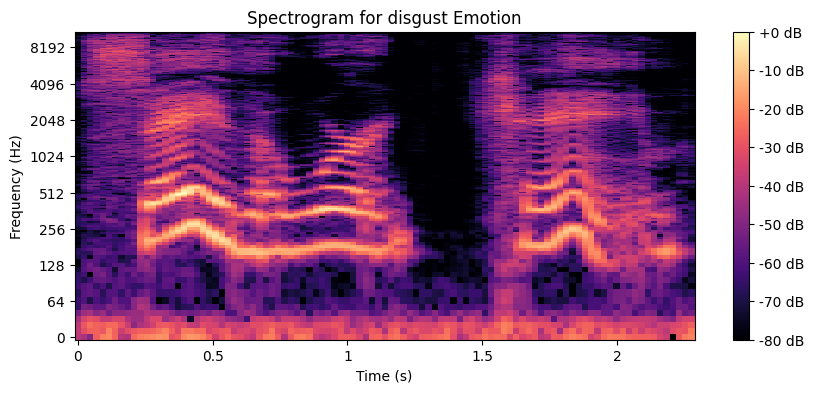

<Figure size 640x480 with 0 Axes>

In [ ]:
# Extract the path of the first audio file with the specified emotion
emotion = 'disgust'
path = df.loc[df['label']==emotion, 'speech'].iloc[0]

# Load the audio file using librosa
data, sampling_rate = librosa.load(path)

# Plot the waveform of the audio data
waveplot(data, sampling_rate, emotion)

# Generate and display the spectrogram of the audio data
spectrogram(data, sampling_rate, emotion)

# Play the loaded audio
Audio(data, rate=sampling_rate)

# Set a title for the plot and display it
plt.suptitle("Disgust  Audio")
plt.show()

# Feature Extraction

In [ ]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-5.4610260e+02,  8.3296249e+01,  2.0410822e+01,  2.3670315e+01,
        2.1719696e+01,  7.0726018e+00, -1.3254461e+01, -1.3395202e+01,
       -1.5219439e+01,  1.8412447e+00, -1.0561053e+01, -1.5335444e+00,
       -8.0208397e-01,  5.0049262e+00, -3.9285793e+00, -1.0099707e+00,
        1.9058231e+00,  6.2038631e+00,  1.2663041e+00, -9.3929920e+00,
        7.0402899e+00, -3.0685298e+00, -5.0871000e+00, -4.2496481e+00,
       -6.0883303e+00,  2.7173414e+00, -5.7491536e+00, -1.6843141e+00,
       -1.8033437e-01,  6.6585283e+00,  7.6488814e+00,  1.3654372e+01,
        1.1509997e+01,  1.3753170e+01,  5.7258801e+00,  3.9933705e+00,
        7.6228924e+00,  1.3229420e+01,  1.2030689e+01,  1.6210804e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1200, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(1200, 40, 1)

# handle categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

y = y.toarray()

y.shape

(1200, 6)

# Create the LSTM Model

In [ ]:
# Import the library
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 1: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate = 0.5))
model.add(Dense(y.shape[1], activation='softmax'))

# Step 3: Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.3227 - loss: 1.6510 - val_accuracy: 0.8375 - val_loss: 1.1121
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6194 - loss: 1.0712 - val_accuracy: 0.9042 - val_loss: 0.5542
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8198 - loss: 0.5865 - val_accuracy: 0.9333 - val_loss: 0.2535
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9317 - loss: 0.2943 - val_accuracy: 0.9458 - val_loss: 0.1689
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9475 - loss: 0.1889 - val_accuracy: 0.9667 - val_loss: 0.0903
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9833 - loss: 0.1061 - val_accuracy: 0.9708 - val_loss: 0.1111
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9694 - loss: 0.1288 - val_accuracy: 0.9667 - val_loss: 0.1024
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9848 - loss: 0.0843 - val_accuracy: 0.9750 - v

# plot train and  val accuracy in graph

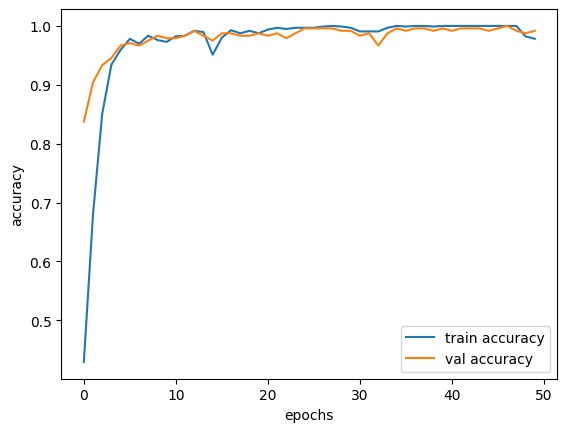

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# plot the train and val loss

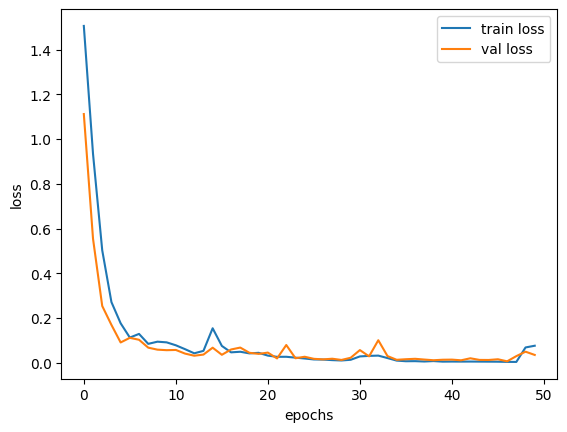

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Features Extraction by anthoer

In [ ]:
from google.colab import drive
import os
import librosa
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your dataset directory in Google Drive
dataset_path = "/content/drive/MyDrive/Audio 1"

# Define paths and labels lists
paths = []
labels = []

# Loop through files in the dataset directory
for filename in os.listdir(dataset_path):
    if filename.endswith(".wav"):  # Assuming your files are in .wav format
        file_path = os.path.join(dataset_path, filename)
        paths.append(file_path)
        label = filename.split('_')[-1].split('.')[0].lower()
        labels.append(label)

# Define function to extract features
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract features (your existing code)
    # Replace this with your existing feature extraction code
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # Continue with other feature extraction steps...

    return mfcc  # Return only MFCC features for demonstration

# Extract features for each audio file
max_length = 1060  # Maximum length of features among all files
all_features = []
for path in paths:
    features = extract_features(path)
    # Ensure all features have the same length by padding or truncating
    if features.shape[1] < max_length:
        pad_width = max_length - features.shape[1]
        features = np.pad(features, ((0, 0), (0, pad_width)), mode='constant')
    elif features.shape[1] > max_length:
        features = features[:, :max_length]
    all_features.append(features)

# Convert features to numpy array
all_features = np.array(all_features)

# Print shape of extracted features
print("Shape of extracted features:", all_features.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of extracted features: (1200, 13, 1060)


# Create the SVM Model

# define dependent and independent features

In [ ]:
# Prepare Data
# Flatten features
X = all_features.reshape(len(all_features), -1)
y = np.array(labels)


# split and train the data

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create sv classifiers

In [ ]:
# Create SVM Model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

# model evaluation

In [ ]:
# Evaluate Model
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9958333333333333
Confusion Matrix:
[[48  0  1  0  0  0]
 [ 0 36  0  0  0  0]
 [ 0  0 35  0  0  0]
 [ 0  0  0 36  0  0]
 [ 0  0  0  0 47  0]
 [ 0  0  0  0  0 37]]


# PLot the graph

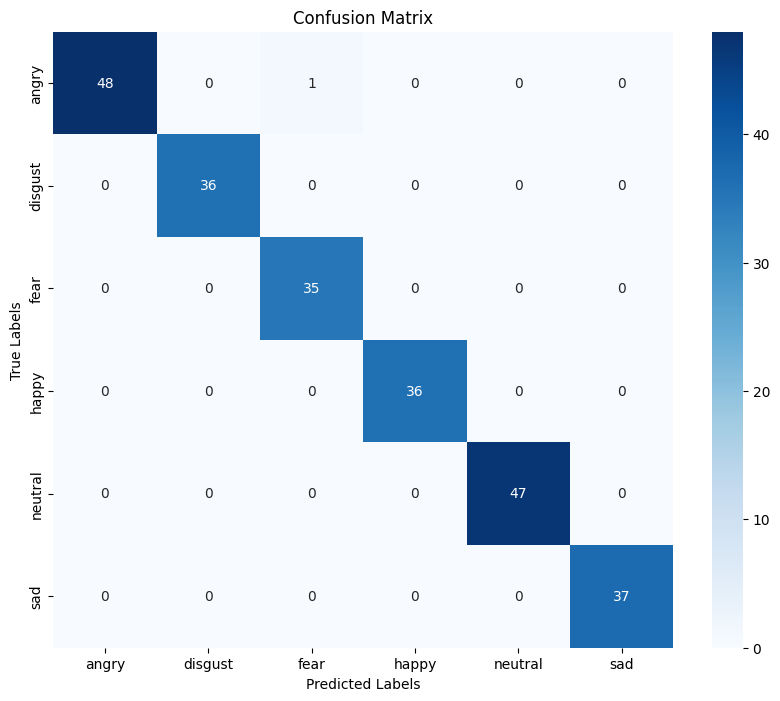

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import os

# Prepare Data
# Flatten features
X = all_features.reshape(len(all_features), -1)
y = np.array(labels)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM Model
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Evaluate Model
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Specify the directory where you want to save the model
model_dir = '/content/drive/MyDrive/Audio'
model_path = os.path.join(model_dir, 'svm_model.joblib')

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the trained SVM model to a file
joblib.dump(svm_classifier, model_path)
print("SVM model saved to:", model_path)


Accuracy: 0.9958333333333333
Confusion Matrix:
[[48  0  1  0  0  0]
 [ 0 36  0  0  0  0]
 [ 0  0 35  0  0  0]
 [ 0  0  0 36  0  0]
 [ 0  0  0  0 47  0]
 [ 0  0  0  0  0 37]]
SVM model saved to: /content/drive/MyDrive/Audio/svm_model.joblib


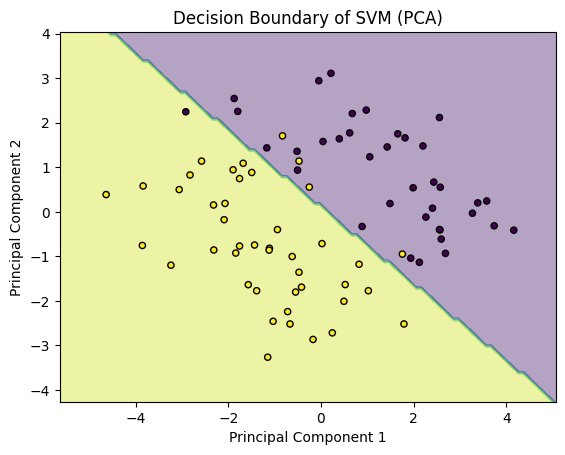

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some data for demonstration
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train SVM on the reduced features
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_pca, y_train)

# Plot decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of SVM (PCA)')
plt.show()


# Create the KNN model

In [ ]:
# Prepare Data
# Flatten features
X = all_features.reshape(len(all_features), -1)
y = np.array(labels)


In [ ]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create the knn model
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Evaluate Model
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9166666666666666
Confusion Matrix:
[[38  0 11  0  0  0]
 [ 0 33  0  2  0  1]
 [ 2  0 33  0  0  0]
 [ 0  2  0 33  1  0]
 [ 0  0  0  0 47  0]
 [ 0  1  0  0  0 36]]


# plot the graph

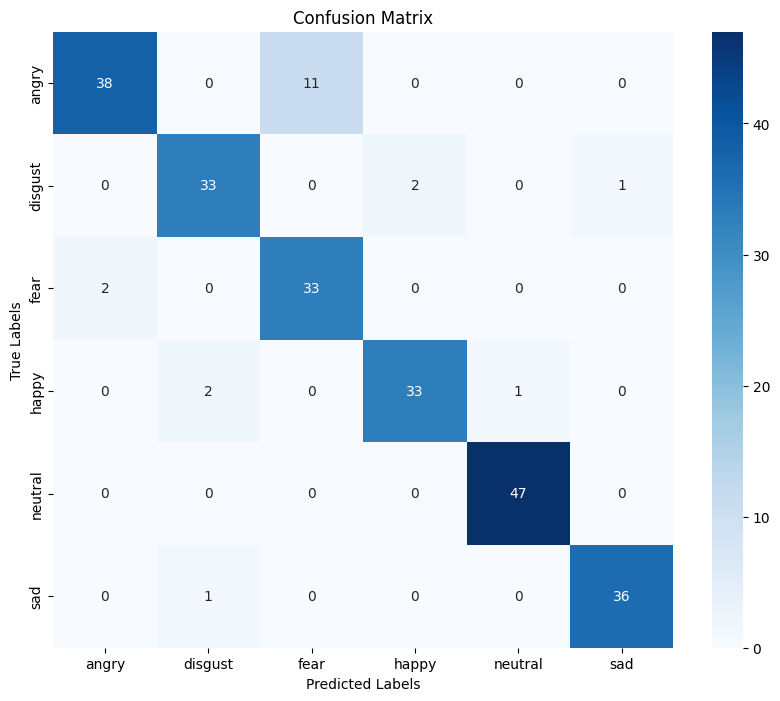

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Predicting sound emotion

In [ ]:
import librosa
import numpy as np
import joblib
import os


def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract features (your existing code)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # Continue with other feature extraction steps...

    # Ensure consistent length of features
    max_length = 1060
    if mfcc.shape[1] < max_length:
        pad_width = max_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    elif mfcc.shape[1] > max_length:
        mfcc = mfcc[:, :max_length]

    return mfcc

def predict_emotion(file_path):
    # Load the trained SVM model
    model_dir = '/content/drive/MyDrive/Audio'
    model_path = os.path.join(model_dir, 'svm_model.joblib')
    svm_classifier = joblib.load(model_path)

    # Extract features from the user-provided audio file
    features = extract_features(file_path)
    print("Shape of extracted features:", features.shape)
    features = features.reshape(1, -1)

    # Make prediction
    emotion_label = svm_classifier.predict(features)
    print("Predicted label:", emotion_label[0])

    return emotion_label[0]

# Prompt the user for the audio file path
audio_file_path = input("Enter the path to the audio file: ")

# Make prediction and print the result
predicted_label = predict_emotion(audio_file_path)
print(f"The predicted emotion label is: {predicted_label}")
Audio(audio_file_path)



Enter the path to the audio file: /content/drive/MyDrive/Audio 1/OAF_book_sad.wav
Shape of extracted features: (13, 1060)
Predicted label: sad
The predicted emotion label is: sad
